- Need to optimize small-r behavior regulation. Extrapolate was working weird for some reason, so currently the small-r region is filled with the end point value
- Bump in $\xi_\eta$?
- Significant disagreement between Zeus built-in $\xi_\eta$ and and our own

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import zeus21

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

In [2]:
UserParams = zeus21.User_Parameters(precisionboost=3)
CosmoParams_input = zeus21.Cosmo_Parameters_Input(kmax_CLASS=1000., USE_RELATIVE_VELOCITIES=True, ANISO_XI_ETA=True)
ClassyCosmo = zeus21.runclass(CosmoParams_input)
CosmoParams = zeus21.Cosmo_Parameters(UserParams, CosmoParams_input, ClassyCosmo) 
CorrFClass = zeus21.Correlations(UserParams, CosmoParams, ClassyCosmo)

In [3]:
r_list = CorrFClass.rlist_CF
xi_eta = CorrFClass.xiEta_RR_CF # This was in Zeus
# xi_eta_aniso = CorrFClass.xiEta_RR_CF_aniso_mnc # This is new

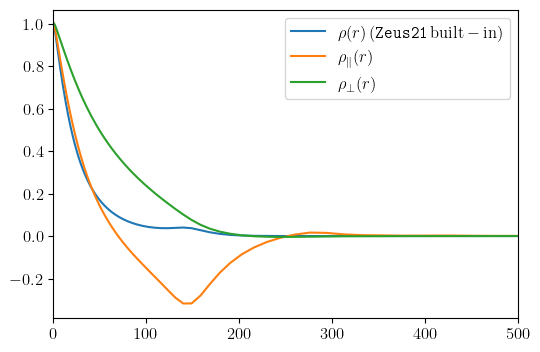

In [5]:
R1choose = 0
R2choose = 0

rlist = CorrFClass.rlist_CF
xi = CorrFClass.xi_RR_CF
xi_para = CorrFClass.xi_RR_CF_para
xi_perp = CorrFClass.xi_RR_CF_perp

rho = xi_eta[R1choose, R2choose, :,] *3/2
rho_para = xi_para[R1choose, R2choose, :,]
rho_perp = xi_perp[R1choose, R2choose, :,]

fig, ax = plt.subplots(1, 1, figsize=(6,4))
# ax.plot(rlist, xi[0, 0, :], label=r'$\xi(r)$')
ax.plot(r_list, rho, label=r'$\rho(r)\,(\texttt{Zeus21}\,\mathrm{built-in})$')
ax.plot(rlist, rho_para, label=r'$\rho_{\parallel}(r)$')
ax.plot(rlist, rho_perp, label=r'$\rho_{\perp}(r)$')
ax.set_xlim(0, 500)
ax.legend()

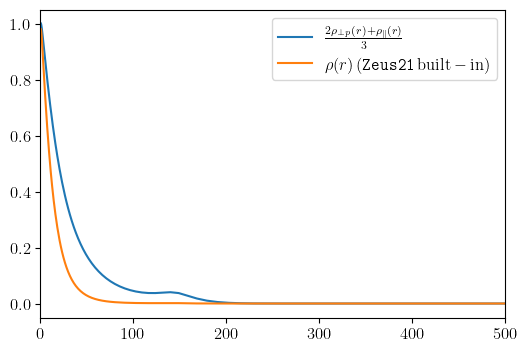

In [10]:
weighted_avg = (2 * rho_perp**2 + rho_para**2) / 3
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(rlist, weighted_avg, label=r'$\frac{2\rho_{\perp p}(r) + \rho_{\parallel}(r)}{3}$')
ax.plot(r_list, rho**2, label=r'$\rho(r)\,(\texttt{Zeus21}\,\mathrm{built-in})$')
ax.set_xlim(0, 500)
ax.legend()

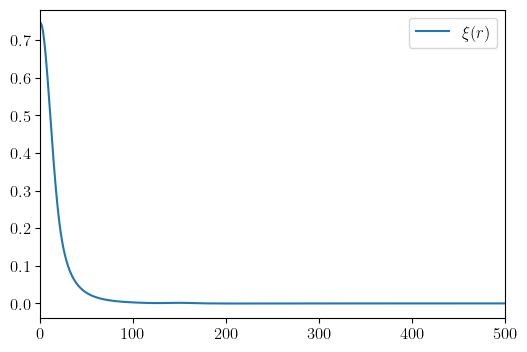

In [ ]:
xi_RR_CF = CorrFClass.xi_RR_CF
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(rlist, xi_RR_CF[50, 50, :], label=r'$\xi(r)$')
ax.set_xlim(0, 500)
ax.legend()

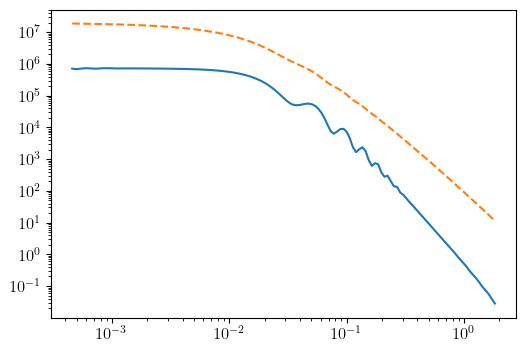

In [ ]:
klist = CorrFClass._klistCF
P_eta_zeus = CorrFClass._PkEtaCF

P_zeus = CorrFClass._PklinCF
P_eta_ours = P_zeus / klist

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.loglog(klist, P_eta_zeus, label=r'$P_{\eta}(k)$')
ax.loglog(klist, P_eta_ours, label=r'$P_{\eta,\mathrm{ours}}(k)$', linestyle='--')
# ax.set_xbound(0, 5)